# Shark Attacks - Project of Data Cleaning/Manipulation

### The archive `attacks.csv` was obtained in [Kaggle](https://www.kaggle.com/teajay/global-shark-attacks#attacks.csv). 

# Objective:

### Identifying if near the release date of the movie Jaws, there was some anomally against other years attacks


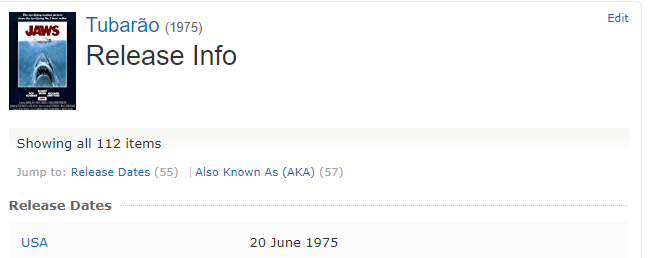

# Importing libs

In [1]:
import pandas as pd
import re
import numpy as np
import seaborn as sns

# Read data from the archive `'attacks.csv'` utilizing enconding `latin_1`

In [2]:
df = pd.read_csv('./attacks.csv', sep = ',', encoding='latin_1')

# Getting to know the dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

# Verification of percentage of collumns with  `missing` values 

In [4]:
df.isnull().mean().round(5)

Case Number               0.66170
Date                      0.75501
Year                      0.75508
Type                      0.75516
Country                   0.75695
Area                      0.77269
Location                  0.77600
Activity                  0.77615
Name                      0.76317
Sex                       0.77697
Age                       0.86506
Injury                    0.75609
Fatal (Y/N)               0.77596
Time                      0.88539
Species                   0.86533
Investigator or Source    0.75567
pdf                       0.75501
href formula              0.75504
href                      0.75501
Case Number.1             0.75501
Case Number.2             0.75501
original order            0.75473
Unnamed: 22               0.99996
Unnamed: 23               0.99992
dtype: float64

# Removing useless columns `Unnamed: 22`  and  `Unnamed:23`

In [5]:
df[(df['Unnamed: 23'].isnull())==False]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,...,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,NaN,Teramo
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,...,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,NaN,change filename


In [6]:
df[(df['Unnamed: 22'].isnull())==False]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1478,2006.05.27,27-May-2006,2006.0,Unprovoked,USA,Hawaii,"North Shore, O'ahu",Surfing,Bret Desmond,M,...,NaN,R. Collier,2006.05.27-Desmond.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.27,2006.05.27,4825.0,stopped here,NaN


In [7]:
df = df.drop(columns=['Unnamed: 22','Unnamed: 23'])

# Removing empty lines of the DataFrame

In [8]:
df = df.dropna(axis=0,how='all', thresh=df.shape[1]*0.80)
df.shape

(5874, 22)

# Adjusting columns names

In [9]:
df.columns = [re.sub('\s+', '_',col.lower().strip().replace(' (y/n)','')) for col in df.columns]

In [10]:
df.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal', 'time', 'species',
       'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order'],
      dtype='object')

# Picking only the interesting columns

In [11]:
df = df.drop(columns=['case_number','name','sex','age','time',
                      'investigator_or_source','location','pdf',
                      'href_formula','href','original_order',
                      'case_number.1','case_number.2','country'])

# Replacing empty fields for `Not_classified`

In [12]:
df = df.mask(df.isnull(),'Not_classified')

# Adjusting <b> YEAR </b> column:

In [13]:
df.loc[df['year'] == 'Not_classified']

,date,year,type,area,activity,injury,fatal,species
187,Reported 08-Jan-2017,Not_classified,Invalid,Queensland,Spearfishing,"No attack, shark made a threat display",Not_classified,Bull shark
6079,Reported 19-Aug-1836,Not_classified,Unprovoked,Cumberland,Swimming,FATAL,Y,Not_classified


In [14]:
df['year'][187] = 2017
df['year'][6079] = 1836

# Dropping <b> DATE </b> column

In [15]:
df = df.drop(columns=['date'])

# Dropping attacks before the year <b> 1900

In [16]:
df = df.drop(df[df.year < 1900].index)

# Adjusting values of the <b> TYPE </b> column:

In [17]:
df['type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'Not_classified', 'Boat', 'Boatomg'], dtype=object)

In [18]:
df['type'] = df['type'].mask((df['type'] == 'Boatomg') |
                             (df['type'] == 'Boating'),'Boat')

df['type'] = df['type'].mask(df['type'] == 'Invalid','Not_classified')

# Adjusting values of the <b> AREA </b> column:

In [19]:
df['area'] = df['area'].apply((lambda x: x.capitalize().strip()))
df['area'] = df['area'].mask(df['area'] == '10ºs, 142ºe','Guam')
df['area'] = df['area'].mask(df['area'] == '19s, 178?','Wake Island')
df['area'] = df['area'].mask(df['area'] == '9.35n 79.35w','Dhanushkodi')
df['area'] = df['area'].mask(df['area'] == '04.05n-13.23w','Liberia')
df['area'] = df['area'].mask(df['area'] == '22ºn, 88ºe','Calcuta')
df['area'] = df['area'].mask(df['area'] == '35º39 : 165º8\'','Midway Atoll')
df['area'] = df['area'].mask(df['area'] == '18s / 50e','Antananaviro')
df['area'] = df['area'].mask(df['area'] == '19s, 178?e','Kadavu Island')

# Using <b> INJURY </b>column to update <b> FATAL</b> column:

In [20]:
df.columns

Index(['year', 'type', 'area', 'activity', 'injury', 'fatal', 'species'], dtype='object')

In [21]:
cond_fatal = df['injury'].str.match('^fatal',flags=re.IGNORECASE)
df['fatal'][cond_fatal] = 'Y'

# Dropping <b> INJURY </b> column

In [22]:
df = df.drop(columns=['injury'])

# Adjusting values of the <b> FATAL (Y/N)</b> column:

In [23]:
df['fatal'].unique()

array(['N', 'Y', 'Not_classified', 'M', 'UNKNOWN', '2017', ' N'],
      dtype=object)

In [24]:
df['fatal'] = df['fatal'].mask((df['fatal'] == 'N ') | 
                                           (df['fatal'] == ' N') | 
                                           (df['fatal'] == 'M') 
                                           ,'N')

df['fatal'] = df['fatal'].mask((df['fatal'] == 'UNKNOWN') |
                                           (df['fatal'] == '2017')
                                           ,'Not_classified')

df['fatal'] = df['fatal'].mask(df['fatal'] == 'y','Y')

# Adjusting type of the <b> YEAR </b> column

In [25]:
df['year'] = pd.to_numeric(df['year'],downcast='integer')

In [26]:
sns.set(style='whitegrid',font='Source Sans Pro')

# Adjusting values of the <b> SPECIES </b> column

In [27]:
shark_list = ['Tiger', 'White', 'Basking', 'Nurse', 'Bull',
              'Lemon', 'Carpet', 'Wobbegong', 'Whale',
              'Mako', 'Thresher', 'Hammerhead']

In [28]:
def correct_species(x, species_list):
    
    for shark in species_list:    
        if re.findall(shark, x, flags=re.IGNORECASE):
            return shark.capitalize() + ' Shark'
    
    return "Not_classified"

In [29]:
df['species'] = df.species.apply(correct_species, species_list=shark_list)

# Adjusting values of the <b> ACTIVITY </b> column

In [30]:
df.activity.value_counts().head(15)

Surfing           962
Swimming          742
Fishing           367
Spearfishing      324
Not_classified    292
Wading            143
Diving             92
Standing           91
Snorkeling         88
Scuba diving       75
Bathing            73
Body boarding      61
Body surfing       49
Swimming           44
Kayaking           33
Name: activity, dtype: int64

In [31]:
activity_list = ['Surfing', 'Swimming', 'Spearfishing',
                 'Fishing', 'Diving', 'Canoeing',
                 'Kayaking', 'Wading', 'Stading']

In [32]:
def correct_activity(x, act_list):
    
    for action in act_list:    
        if re.findall(action, x, flags=re.IGNORECASE):
            return action.capitalize()
    
    return "Not_classified"

In [33]:
df['activity'] = df.activity.apply(correct_activity, act_list=activity_list)

# Histogram of attacks since <b> 1900 </b>

[Text(0, 0.5, 'Count of attacks')]

C:\Users\rodri\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Source Sans Pro'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\rodri\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Source Sans Pro'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


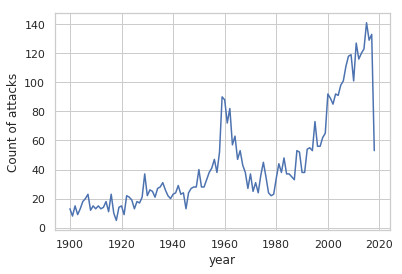

In [34]:
attacks_year = df.groupby(by=['year'],as_index=False,)[['fatal']].count()
plt_attacks_year = sns.lineplot(data=attacks_year,x='year',y='fatal')

plt_attacks_year.set(ylabel='Count of attacks')

# Categorical Histogram of attacks since <b> 1900 </b>

[Text(0, 0.5, 'Count of attacks')]

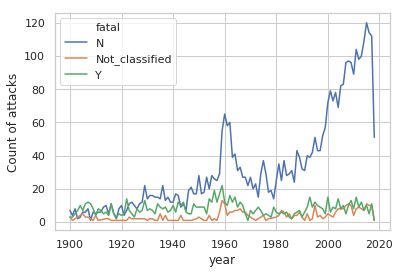

In [35]:
attacks_year_fatal = df.groupby(by=['year','fatal'],as_index=False)[['type']].count()
plt_attacks_year_fatal = sns.lineplot(x="year", y="type", hue="fatal", data = attacks_year_fatal)
plt_attacks_year_fatal.set(ylabel='Count of attacks')

# Histogram of attacks between <b> 1960 - 1990 </b>

[Text(0, 0.5, 'Count of attacks')]

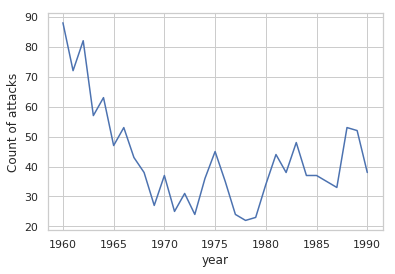

In [36]:
attacks_1960_1990 = df.loc[df['year'].between(1960,1990)].groupby(by=['year'],as_index=False,)[['fatal']].count()
plt_attacks_1960_1990 = sns.lineplot(data=attacks_1960_1990,x='year',y='fatal')
plt_attacks_1960_1990.set(ylabel='Count of attacks')

# Categorical Histogram of attacks between <b> 1960 - 1990 </b>

[Text(0, 0.5, 'Count of attacks')]

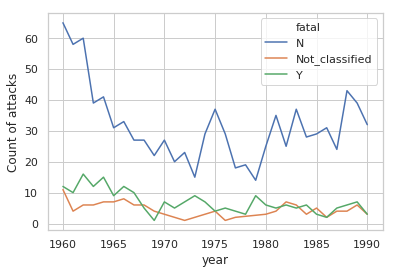

In [37]:
hist_attacks_1960_1990 = df.loc[df['year'].between(1960,1990)].groupby(by=['year','fatal'],as_index=False)[['type']].count()
plt_hist_attacks_1960_1990 = sns.lineplot(x="year", y="type", hue="fatal", data=hist_attacks_1960_1990)
plt_hist_attacks_1960_1990.set(ylabel='Count of attacks')

# Comparison of Attacks per fatal (y/n)

[Text(0, 0.5, 'Count of attacks')]

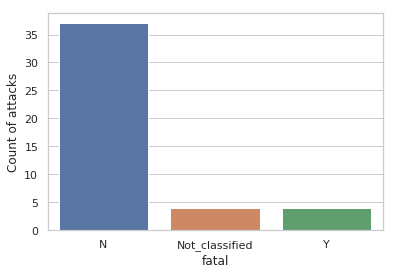

In [46]:
attacks_1975 = df.loc[df['year'] == 1975].groupby(by=['year','fatal'],as_index=False)[['type']].count()
plt_attacks_1975 = sns.barplot(x='fatal', y='type', data = attacks_1975)
plt_attacks_1975.set(ylabel='Count of attacks')

In [39]:
def countplot_top_prop_label(graph,df,size):
    """
        This function plots the proportion value when plotting a countplot with seaborn.
        Params:
        graph: The instance created with seaborn
        df: dataframe
        size: size of the labels to be placed in the graph
    """
    for elem in graph.patches:
        h = elem.get_height()
        total = len(df)
        graph.text(elem.get_x()+elem.get_width()/2., h + 3, '{:1.2f}%'.format(h/total*100), ha="center", fontsize=size) 

C:\Users\rodri\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Source Sans Pro'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


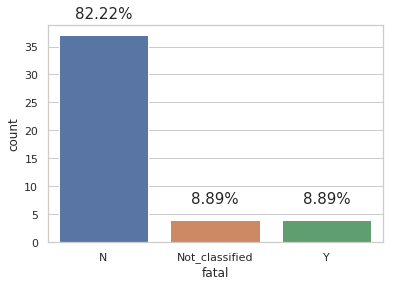

In [40]:
attack_peixero = sns.countplot('fatal',data=df.loc[df['year'] == 1975,:])
countplot_top_prop_label(attack_peixero,df.loc[df['year'] == 1975,:],15)

# Top 5 attacks per area

[Text(0.5, 0, 'Count of attacks')]

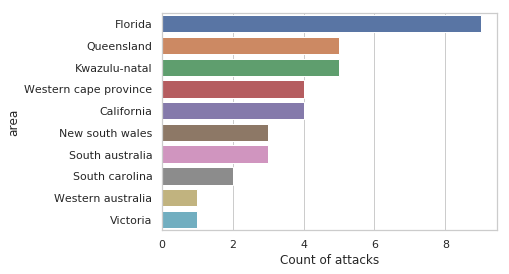

In [41]:
attacks_area = df.loc[df['year'] == 1975].groupby(by=['area'],as_index=False)[['type']].count().sort_values(by='type', ascending=False)
plt_attacks_area = sns.barplot(x='type', y='area', data= attacks_area.head(10))
plt_attacks_area.set(xlabel='Count of attacks')

# Top 5 attacks per activity

[Text(0.5, 0, 'Count of attacks')]

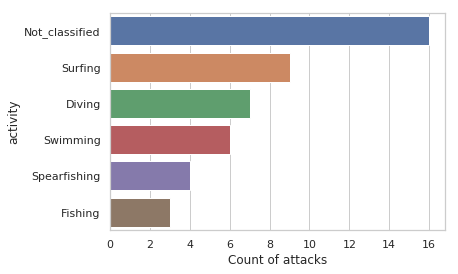

In [42]:
attacks_activity = df.loc[df['year'] == 1975].groupby(by=['activity'],as_index=False)[['type']].count().sort_values(by='type', ascending=False)
plt_attacks_activity = sns.barplot(x='type', y='activity', data= attacks_activity.head(10))
plt_attacks_activity.set(xlabel='Count of attacks')

# Top 5 attacks per species

[Text(0.5, 0, 'Count of attacks')]

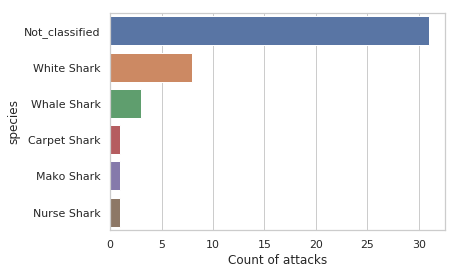

In [43]:
attacks_species = df.loc[df['year'] == 1975].groupby(by=['species'],as_index=False)[['type']].count().sort_values(by='type', ascending=False)
plt_attacks_species = sns.barplot(x='type', y='species', data= attacks_species.head(10))
plt_attacks_species.set(xlabel='Count of attacks')

# Comparison of attacks per year

[Text(0, 0.5, 'Count of attacks')]

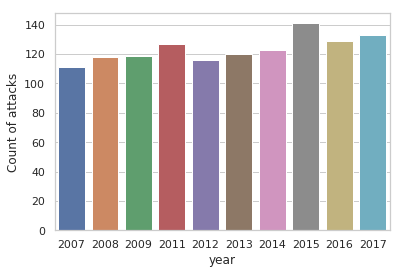

In [44]:
attacks_top_years = df.groupby(by=['year'],as_index=False,)[['fatal']].count().sort_values(by='fatal', ascending = False)
plt_attacks_top_years = sns.barplot(x='year', y='fatal', data = attacks_top_years.head(10))
plt_attacks_top_years.set(ylabel='Count of attacks')